# Time series visualization 

In [ ]:
import pandas as pd
data=pd.read_csv("C:/Users/Aditya Chandra/Desktop/intern/time_series_covid_19_confirmed.csv",index_col=0)

In [53]:
data.head()

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,4/28/20,4/29/20,4/30/20,05-01-2020,05-02-2020,05-03-2020,05-04-2020,confirmed,recovered,deaths
Province/State,,,,,,,,,,,,,,,,,,,,,
NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,...,1828,1939,2171,2335,2469,2704,2894,3224,421.0,95
NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,...,750,766,773,782,789,795,803,820,570.0,31
NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,...,3649,3848,4006,4154,4295,4474,4648,4838,2067.0,470
NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,...,743,743,745,745,747,748,750,751,514.0,46
NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,...,27,27,27,30,35,35,35,36,11.0,2


In [54]:
data.columns

Index(['Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20', '1/24/20',
       '1/25/20', '1/26/20', '1/27/20', '1/28/20',
       ...
       '4/28/20', '4/29/20', '4/30/20', '05-01-2020', '05-02-2020',
       '05-03-2020', '05-04-2020', 'confirmed', 'recovered', 'deaths'],
      dtype='object', length=110)

In [4]:
data.reset_index

<bound method DataFrame.reset_index of                        Country/Region        Lat       Long  1/22/20  1/23/20  \
Province/State                                                                  
NaN                       Afghanistan  33.000000  65.000000        0        0   
NaN                           Albania  41.153300  20.168300        0        0   
NaN                           Algeria  28.033900   1.659600        0        0   
NaN                           Andorra  42.506300   1.521800        0        0   
NaN                            Angola -11.202700  17.873900        0        0   
...                               ...        ...        ...      ...      ...   
NaN                    Western Sahara  24.215500 -12.885800        0        0   
NaN             Sao Tome and Principe   0.186360   6.613081        0        0   
NaN                             Yemen  15.552727  48.516388        0        0   
NaN                           Comoros -11.645500  43.333300        0  

In [55]:
data=data.set_index('Country/Region')

In [56]:
columns_to_keep=['Lat','Long','confirmed','recovered','deaths']
data=data[columns_to_keep]
data.head()

,Lat,Long,confirmed,recovered,deaths
Country/Region,,,,,
Afghanistan,33.0000,65.0000,3224,421.0,95
Albania,41.1533,20.1683,820,570.0,31
Algeria,28.0339,1.6596,4838,2067.0,470
Andorra,42.5063,1.5218,751,514.0,46
Angola,-11.2027,17.8739,36,11.0,2


In [57]:
import numpy as np
data=data.groupby('Country/Region').agg({'confirmed':np.sum,'recovered':np.sum,'deaths':np.sum})
data

,confirmed,recovered,deaths
Country/Region,,,
Afghanistan,3224,421.0,95
Albania,820,570.0,31
Algeria,4838,2067.0,470
Andorra,751,514.0,46
Angola,36,11.0,2
...,...,...,...
West Bank and Gaza,371,43.0,2
Western Sahara,6,0.0,0
Yemen,22,0.0,4


In [58]:
import matplotlib.pyplot as plt


def plot_timeseries(axes, x, y, color, xlabel, ylabel):

  axes.plot(x, y, color=color)
  axes.set_xlabel(xlabel)
  axes.set_ylabel(ylabel, color=color)
  axes.tick_params('y', colors=color)

In [51]:
#considering only those countries where there is atleast 1 case
data=data[data['confirmed']!=0]
data

,confirmed,recovered,deaths
Country/Region,,,
Brazil,115455,911.0,7938
France,170687,189034.0,25537
Germany,167007,10.0,6993
Italy,213013,9333.0,29315
Russia,155370,15.0,1451
Spain,219329,70.0,25613
Turkey,129491,73285.0,3520
US,1204351,189791.0,71064
United Kingdom,196243,902.0,29501


# Comparison of Confirmed v/s Recovered in time span of 14 days

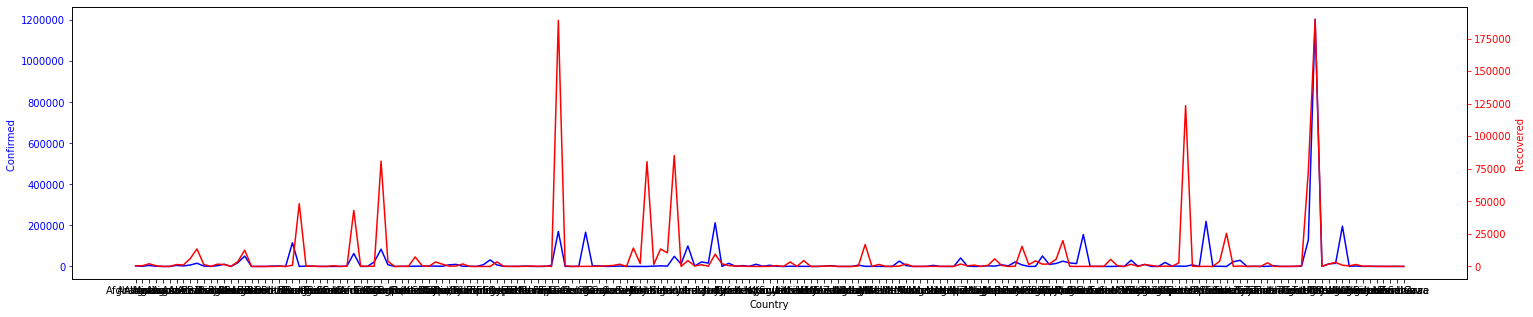

Text(0.5, 1, 'Comparison of Confirmed V/S Recovered')

In [108]:

fig,ax=plt.subplots(sharex=True)
plt.rcParams["figure.figsize"] = (30,10)
plot_timeseries(ax,data.index,data['confirmed'],'b','Country','Confirmed ')
ax2=ax.twinx()
plot_timeseries(ax2,data.index,data['recovered'],'r','Country','Recovered ')
plt.show()
ax.set_xticklabels(data.index,rotation=90)
axes.set_title("Comparison of Confirmed V/S Recovered")



# Comparison of Confirmed v/s Deaths in time span of 14 days

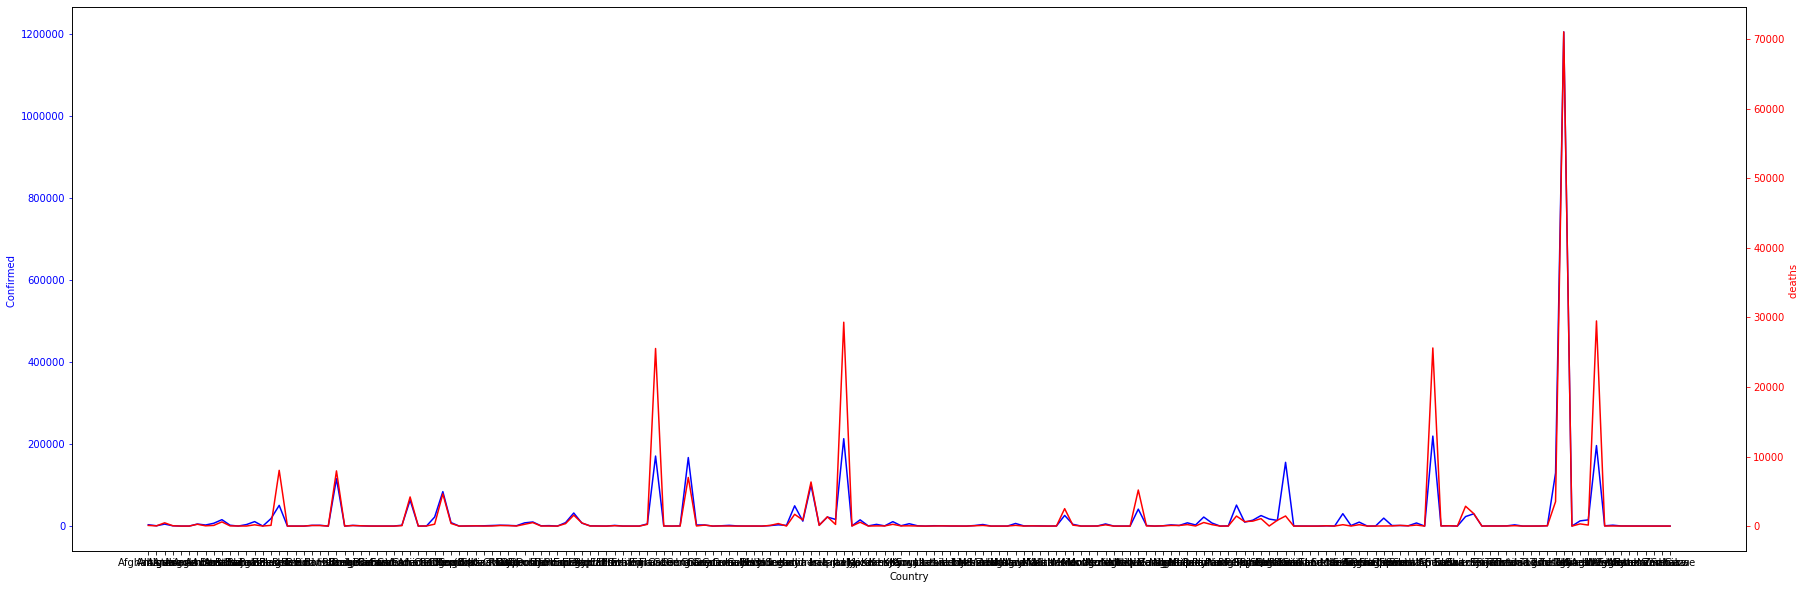

[Text(0, 0, 'Afghanistan'),
 Text(1, 0, 'Albania'),
 Text(2, 0, 'Algeria'),
 Text(3, 0, 'Andorra'),
 Text(4, 0, 'Angola'),
 Text(5, 0, 'Antigua and Barbuda'),
 Text(6, 0, 'Argentina'),
 Text(7, 0, 'Armenia'),
 Text(8, 0, 'Australia'),
 Text(9, 0, 'Austria'),
 Text(10, 0, 'Azerbaijan'),
 Text(11, 0, 'Bahamas'),
 Text(12, 0, 'Bahrain'),
 Text(13, 0, 'Bangladesh'),
 Text(14, 0, 'Barbados'),
 Text(15, 0, 'Belarus'),
 Text(16, 0, 'Belgium'),
 Text(17, 0, 'Belize'),
 Text(18, 0, 'Benin'),
 Text(19, 0, 'Bhutan'),
 Text(20, 0, 'Bolivia'),
 Text(21, 0, 'Bosnia and Herzegovina'),
 Text(22, 0, 'Botswana'),
 Text(23, 0, 'Brazil'),
 Text(24, 0, 'Brunei'),
 Text(25, 0, 'Bulgaria'),
 Text(26, 0, 'Burkina Faso'),
 Text(27, 0, 'Burma'),
 Text(28, 0, 'Burundi'),
 Text(29, 0, 'Cabo Verde'),
 Text(30, 0, 'Cambodia'),
 Text(31, 0, 'Cameroon'),
 Text(32, 0, 'Canada'),
 Text(33, 0, 'Central African Republic'),
 Text(34, 0, 'Chad'),
 Text(35, 0, 'Chile'),
 Text(36, 0, 'China'),
 Text(37, 0, 'Colombia'),
 Text

In [22]:
fig,ax=plt.subplots()
plt.rcParams["figure.figsize"] = (30,10)
plot_timeseries(ax,data.index,data['confirmed'],'b','Country','Confirmed ')
ax2=ax.twinx()
plot_timeseries(ax2,data.index,data['deaths'],'r','Country','deaths ')
plt.show()
ax.set_xticklabels(data.index,rotation=90)




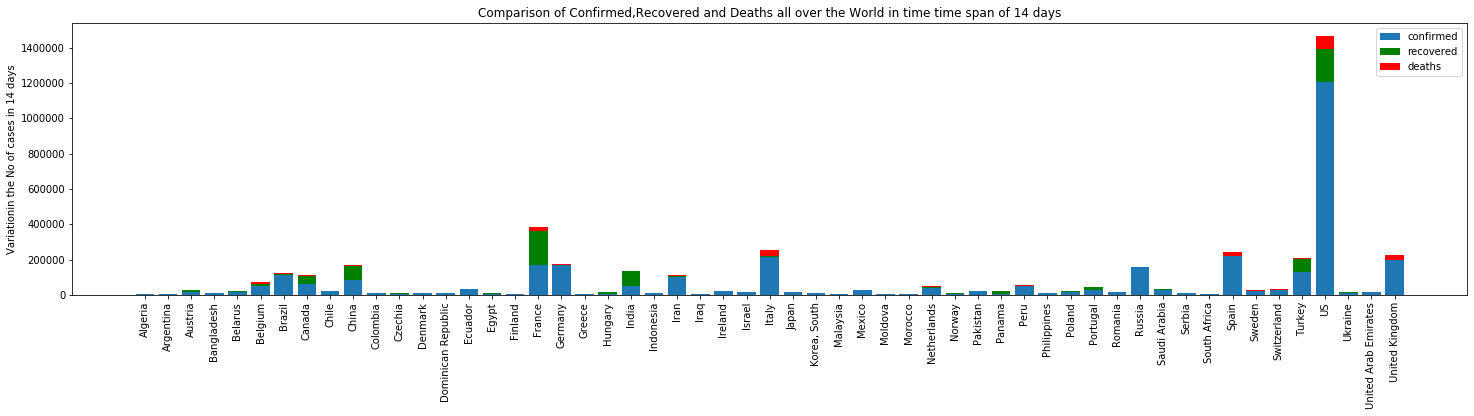

In [105]:
pg=data[data['deaths']>100]#considering only those countries where count of death is greater than 100
plt.rcParams["figure.figsize"] = (25,5)
fig,axes=plt.subplots()

axes.bar(pg.index,pg['confirmed'])

axes.set_title("Comparison of Confirmed,Recovered and Deaths all over the World in time time span of 14 days")

axes.bar(pg.index,pg['recovered'],bottom=pg['confirmed'],color='g')
axes.bar(pg.index,pg['deaths'],bottom=pg['confirmed']+pg['recovered'],color='r')
axes.set_xticklabels(pg.index,rotation=90)
axes.set_ylabel("Variationin the No of cases in 14 days")
axes.legend(['confirmed','recovered','deaths'])


In [31]:
#analyzing averavege data of all over the world
data.describe()

,confirmed,recovered,deaths
count,1.870000e+02,187.000000,187.000000
mean,1.958658e+04,6410.866310,1375.609626
std,9.454428e+04,24542.840962,6584.552289
min,3.000000e+00,0.000000,0.000000
25%,1.250000e+02,19.000000,3.000000
50%,8.350000e+02,213.000000,18.000000
75%,7.362000e+03,1731.500000,182.000000
max,1.204351e+06,189791.000000,71064.000000


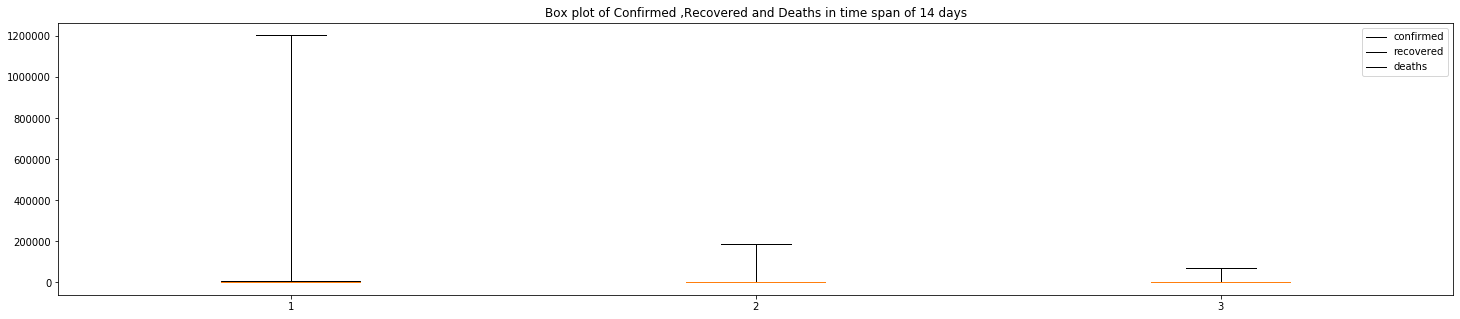

In [106]:
plt.figure()
plt.boxplot([data['confirmed'],data['recovered'],data['deaths']],whis='range')
plt.title("Box plot of Confirmed ,Recovered and Deaths in time span of 14 days")
plt.legend(['confirmed','recovered','deaths'])

In [83]:
df=pd.read_csv("C:/Users/Aditya Chandra/Desktop/intern/time_series_covid_19_confirmed.csv",index_col=0)
df

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,4/28/20,4/29/20,4/30/20,05-01-2020,05-02-2020,05-03-2020,05-04-2020,confirmed,recovered,deaths
Province/State,,,,,,,,,,,,,,,,,,,,,
NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,0,...,1828,1939,2171,2335,2469,2704,2894,3224,421.0,95
NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,0,...,750,766,773,782,789,795,803,820,570.0,31
NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,...,3649,3848,4006,4154,4295,4474,4648,4838,2067.0,470
NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,...,743,743,745,745,747,748,750,751,514.0,46
NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,...,27,27,27,30,35,35,35,36,11.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,NaN,0
NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,0,...,8,8,14,16,16,16,23,174,NaN,3
NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,0,...,1,6,6,7,10,10,12,22,NaN,4


In [90]:
latf=df.groupby(df['Country/Region']).agg({'Lat':np.average,'confirmed':np.sum,'recovered':np.sum})
latf

C:\Users\Aditya Chandra\anaconda3\lib\site-packages\numpy\lib\function_base.py:393: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\Aditya Chandra\anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,Lat,confirmed,recovered
Country/Region,,,
Afghanistan,33.000000,3224,421.0
Albania,41.153300,820,570.0
Algeria,28.033900,4838,2067.0
Andorra,42.506300,751,514.0
Angola,-11.202700,36,11.0
...,...,...,...
West Bank and Gaza,31.952200,371,43.0
Western Sahara,24.215500,6,0.0
Yemen,15.552727,22,0.0


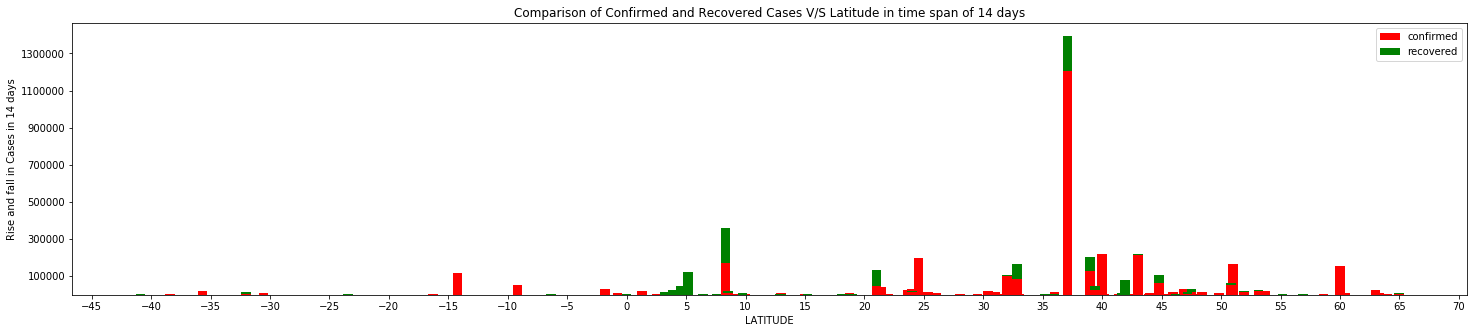

In [107]:
plt.bar(latf['Lat'],latf['confirmed'],color='r')
plt.xlabel('LATITUDE')
plt.xticks(np.arange(-80,80,5))
plt.yticks(np.arange(100000,1400000,200000))
plt.title('Comparison of Confirmed and Recovered Cases V/S Latitude in time span of 14 days')
plt.ylabel("Rise and fall in Cases in 14 days")
plt.bar(latf['Lat'],latf['recovered'],bottom=latf['confirmed'],color='g')
plt.legend(['confirmed','recovered'])



,Lat,recovered
Country/Region,,
Afghanistan,33.000000,421.0
Albania,41.153300,570.0
Algeria,28.033900,2067.0
Andorra,42.506300,514.0
Angola,-11.202700,11.0
...,...,...
West Bank and Gaza,31.952200,43.0
Western Sahara,24.215500,0.0
Yemen,15.552727,0.0
